In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sps
import pymc3 as pm
import arviz as az


sns.set()

In [49]:
### direct normal irradiance, Wh/m2 ###
sol_df = pd.read_csv('smhi_radiation.csv',sep=' ',header=None)
sol_df.columns = ['year','month','day','param','value']
sol_df

,year,month,day,param,value
0,2002,1,1,23,24.8
1,2002,1,2,23,2713.3
2,2002,1,3,23,100.1
3,2002,1,4,23,890.0
4,2002,1,5,23,2551.3
...,...,...,...,...,...
6935,2020,12,27,23,0.0
6936,2020,12,28,23,0.0
6937,2020,12,29,23,0.0
6938,2020,12,30,23,0.7


In [50]:
sol_df['date'] = pd.to_datetime(sol_df[['year','month','day']])
sol_df.set_index('date',inplace=True)
sol_df.drop(['year','month','day','param'],inplace=True,axis=1)

In [51]:
sol_df

,value
date,
2002-01-01,24.8
2002-01-02,2713.3
2002-01-03,100.1
2002-01-04,890.0
2002-01-05,2551.3
...,...
2020-12-27,0.0
2020-12-28,0.0
2020-12-29,0.0


<AxesSubplot:xlabel='date'>

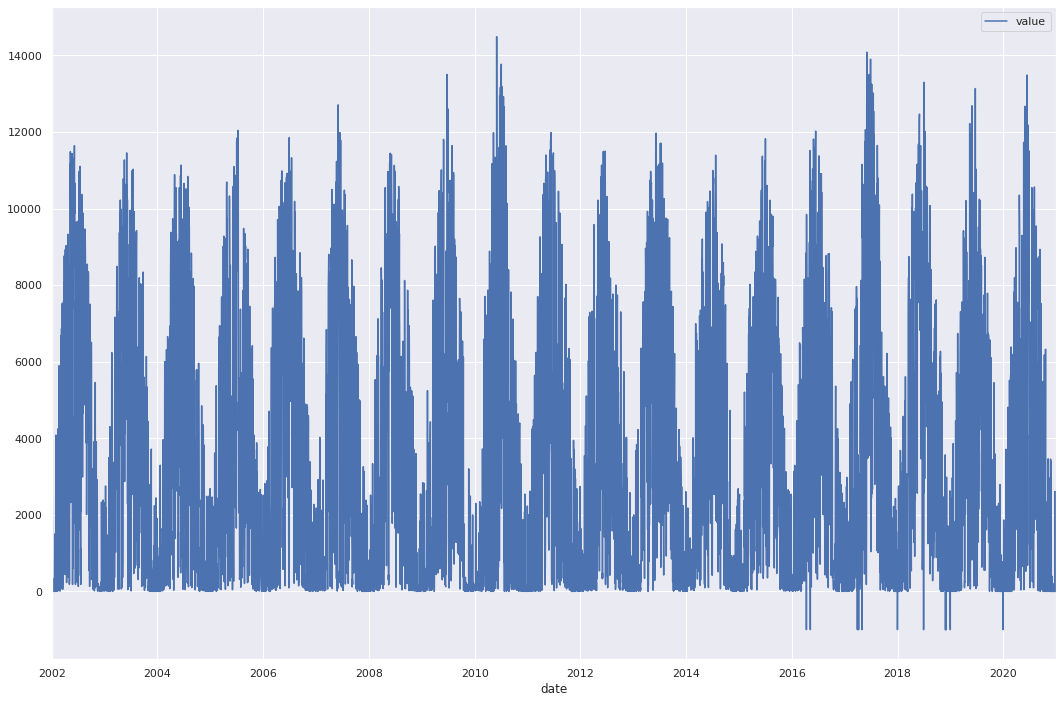

In [52]:
sol_df.plot(figsize=(18,12))

In [53]:
sol_df = sol_df.loc[~(sol_df['value'] < 0)]
sol_df

,value
date,
2002-01-01,24.8
2002-01-02,2713.3
2002-01-03,100.1
2002-01-04,890.0
2002-01-05,2551.3
...,...
2020-12-27,0.0
2020-12-28,0.0
2020-12-29,0.0


<AxesSubplot:xlabel='date'>

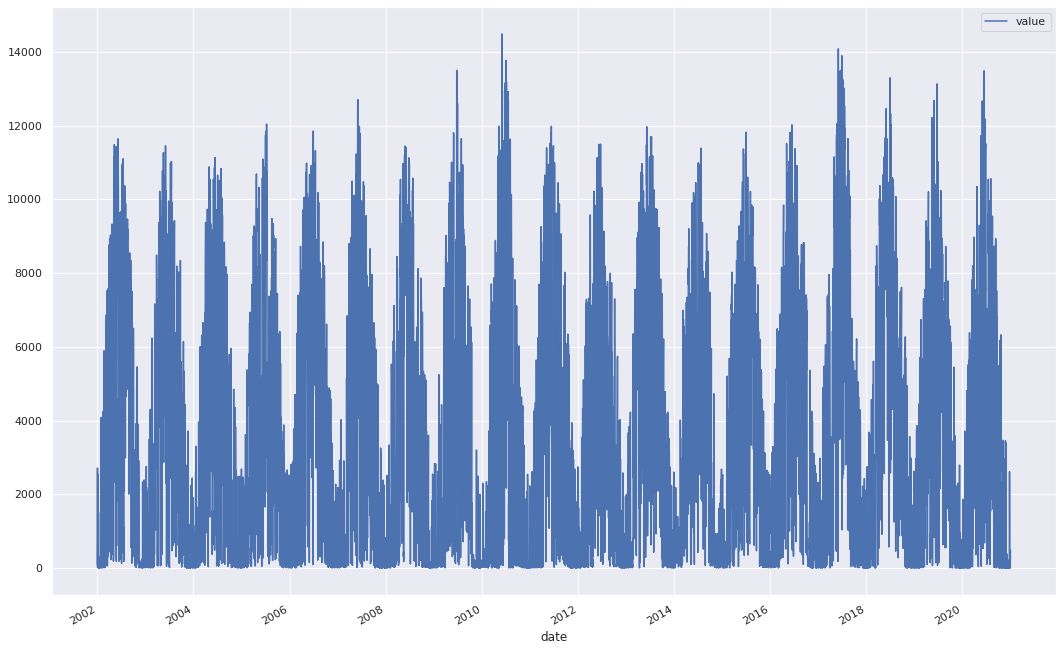

In [54]:
sol_df.plot(figsize=(18,12))

In [55]:
monthly_radiation = sol_df.resample('M').sum()
monthly_radiation

,value
date,
2002-01-31,15273.6
2002-02-28,35876.1
2002-03-31,120678.5
2002-04-30,176472.4
2002-05-31,215257.6
...,...
2020-08-31,167012.2
2020-09-30,93993.0
2020-10-31,49815.5


In [56]:
summer_months = monthly_radiation.loc[monthly_radiation.index.month.isin([5,6,7,8])]

summer_months.groupby(summer_months.index.year).sum()

,value
date,
2002,808686.0
2003,670705.4
2004,640423.7
2005,593643.6
2006,776365.8
2007,650434.1
2008,738994.2
2009,686019.6
2010,674028.2


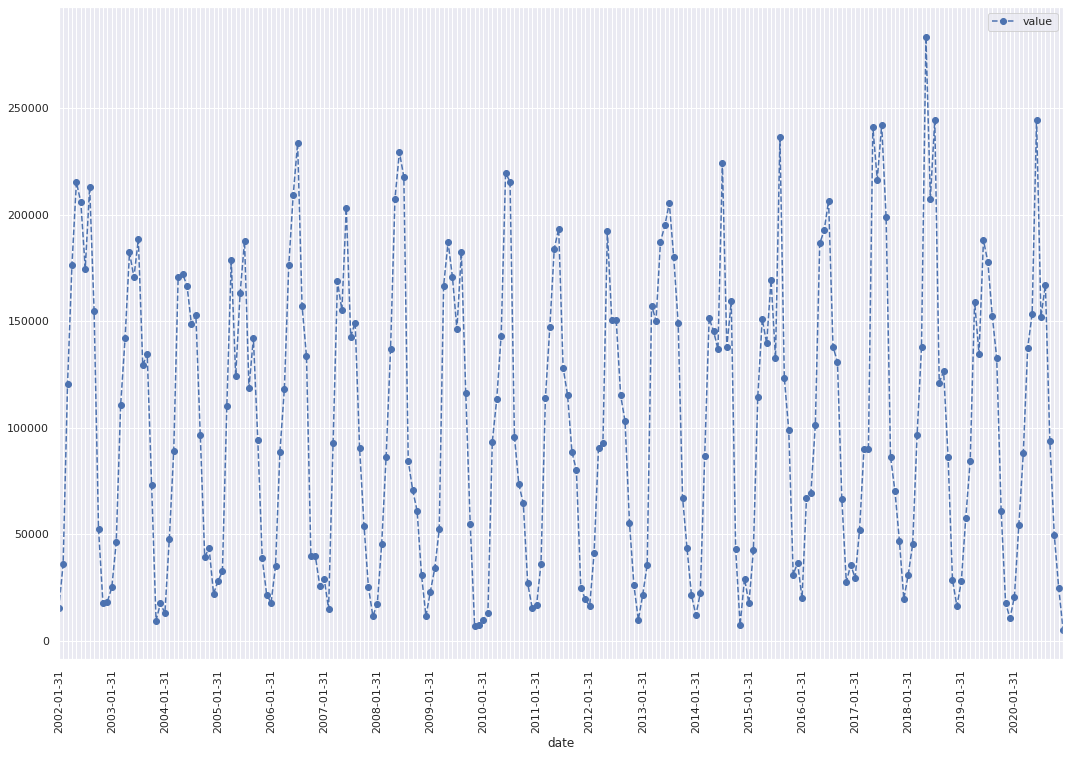

In [57]:
ax = monthly_radiation.plot(figsize=(18,12),style='o--')
_=ax.set_xticks(monthly_radiation.index)
_= ax.set_xticklabels(monthly_radiation.index.date,rotation=90)

for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 12 != 0:
        label.set_visible(False)

In [58]:
yearly_radiation = sol_df.resample('Y').sum()
yearly_radiation

,value
date,
2002-12-31,1400695.1
2003-12-31,1229476.8
2004-12-31,1162989.5
2005-12-31,1239693.2
2006-12-31,1275267.5
2007-12-31,1137704.9
2008-12-31,1199215.0
2009-12-31,1148516.2
2010-12-31,1084488.3


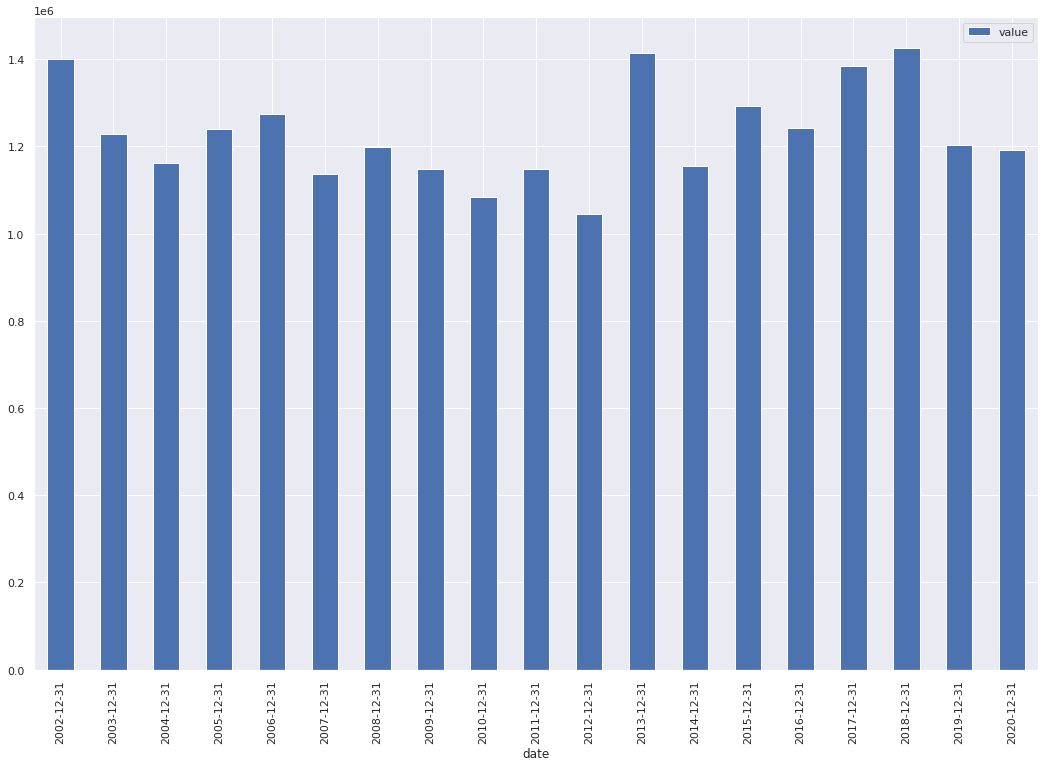

In [59]:
ax = yearly_radiation.plot(figsize=(18,12),kind='bar')
_= ax.set_xticklabels(yearly_radiation.index.date)

In [60]:
pop_death_data = pd.read_pickle('pop_death_data.pkl')
pop_death_data

,pop,dead,mortality,exp_dead_base_15_18,exp_dead_base_15_19,excess_15_18,excess_15_19
year,,,,,,,
2002,8939367,95009,0.010628,81559.306993,80626.367583,13449.693007,14382.632417
2003,8973472,92961,0.010360,81870.467746,80933.969035,11090.532254,12027.030965
2004,9008883,90532,0.010049,82193.543935,81253.349624,8338.456065,9278.650376
2005,9042663,91710,0.010142,82501.739514,81558.019820,9208.260486,10151.980180
2006,9107935,91177,0.010011,83097.255851,82146.724173,8079.744149,9030.275827
2007,9174464,91729,0.009998,83704.240566,82746.765721,8024.759434,8982.234279
2008,9248976,91449,0.009887,84384.059068,83418.807925,7064.940932,8030.192075
2009,9331619,90080,0.009653,85138.061651,84164.185634,4941.938349,5915.814366
2010,9408320,90487,0.009618,85837.851737,84855.970972,4649.148263,5631.029028


In [61]:
monthly_excess = pd.read_pickle('monthly_excess_15_21_YTD.pkl')
monthly_excess

2015-01-31      -8.560492
2015-02-28     252.536959
2015-03-31     238.785857
2015-04-30     211.022447
2015-05-31     275.047515
                 ...     
2021-01-31     830.619053
2021-02-28    -899.616375
2021-03-31   -1271.475744
2021-04-30    -779.633171
2021-05-31   -1356.503708
Freq: M, Length: 77, dtype: float64

In [62]:
yearly_radiation['mortality'] = pop_death_data['mortality'].values
yearly_radiation

,value,mortality
date,,
2002-12-31,1400695.1,0.010628
2003-12-31,1229476.8,0.010360
2004-12-31,1162989.5,0.010049
2005-12-31,1239693.2,0.010142
2006-12-31,1275267.5,0.010011
2007-12-31,1137704.9,0.009998
2008-12-31,1199215.0,0.009887
2009-12-31,1148516.2,0.009653
2010-12-31,1084488.3,0.009618


In [63]:
yearly_radiation.corr()

,value,mortality
value,1.000000,-0.069357
mortality,-0.069357,1.000000


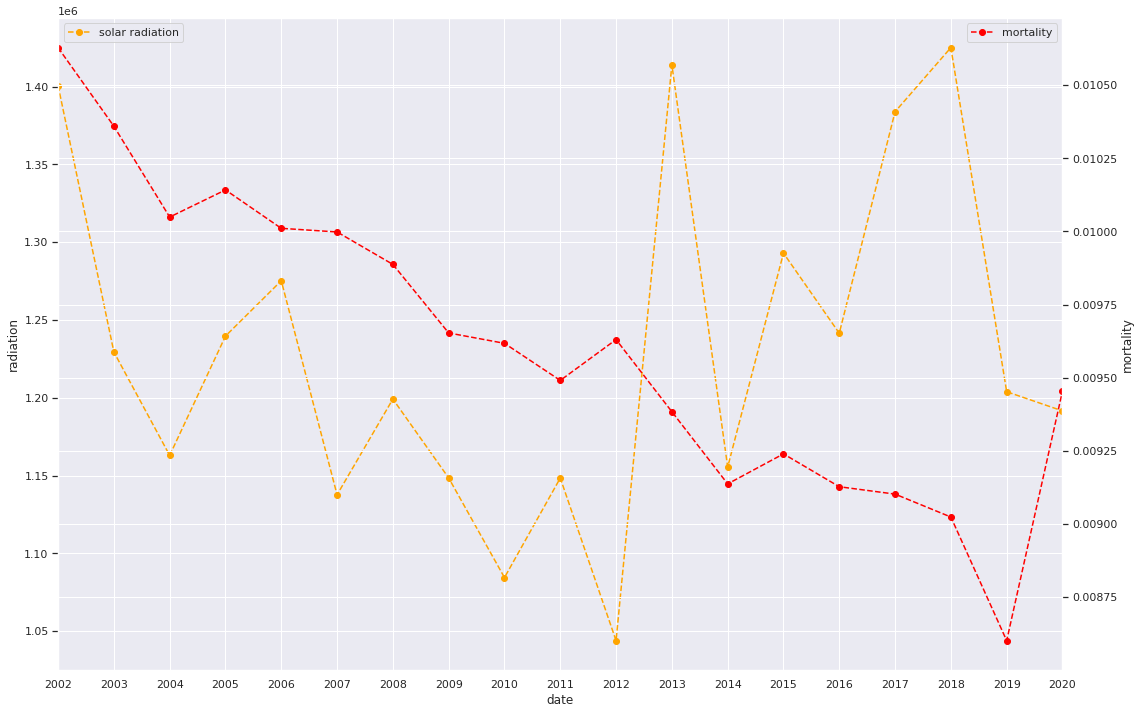

In [64]:
ax = yearly_radiation['value'].plot(ls='dashed',marker='o',color='orange',figsize=(18,12),label='solar radiation')
ax2 = ax.twinx()

yearly_radiation['mortality'].plot(ax=ax2,ls='dashed',marker='o',color='red',label='mortality')

ax.set_ylabel('radiation')
ax2.set_ylabel('mortality')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_xticks(yearly_radiation.index)
_= ax.set_xticklabels(yearly_radiation.index.year)

<AxesSubplot:xlabel='value'>

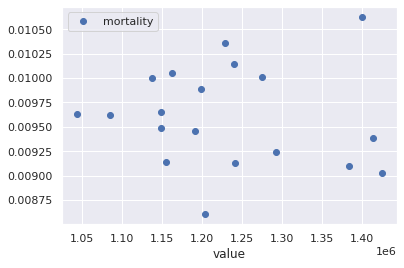

In [65]:
yearly_radiation.plot(x='value',y='mortality',style='o')

                      value  mortality  value_shifted  mortality_shifted
value              1.000000  -0.069357       0.078167          -0.221156
mortality         -0.069357   1.000000      -0.258326           0.854831
value_shifted      0.078167  -0.258326       1.000000          -0.075927
mortality_shifted -0.221156   0.854831      -0.075927           1.000000


,value,mortality,value_shifted,mortality_shifted
date,,,,
2002-12-31,1400695.1,0.010628,NaN,NaN
2003-12-31,1229476.8,0.010360,1400695.1,0.010628
2004-12-31,1162989.5,0.010049,1229476.8,0.010360
2005-12-31,1239693.2,0.010142,1162989.5,0.010049
2006-12-31,1275267.5,0.010011,1239693.2,0.010142
2007-12-31,1137704.9,0.009998,1275267.5,0.010011
2008-12-31,1199215.0,0.009887,1137704.9,0.009998
2009-12-31,1148516.2,0.009653,1199215.0,0.009887
2010-12-31,1084488.3,0.009618,1148516.2,0.009653


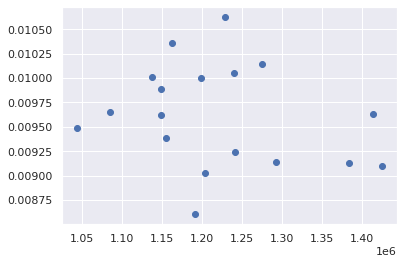

In [66]:
yearly_radiation['value_shifted'] = yearly_radiation['value'].shift()
yearly_radiation['mortality_shifted'] = yearly_radiation['mortality'].shift()
plt.scatter(yearly_radiation['value'],yearly_radiation['mortality_shifted'])

print (yearly_radiation.corr())

yearly_radiation

In [67]:
def normalize(s):
    return (s - s.mean()) / s.std()

In [68]:
monthly_mortality = pd.read_pickle('monthly_mort_2015_2021.pkl')
#monthly_mortality = normalize(monthly_excess['2015':'2020'])

monthly_mortality

2015-01-31    0.000887
2015-02-28    0.000829
2015-03-31    0.000885
2015-04-30    0.000790
2015-05-31    0.000751
                ...   
2020-12-31    0.000986
2021-01-31    0.000982
2021-02-28    0.000727
2021-03-31    0.000750
2021-04-30    0.000703
Freq: M, Name: daily_mortality, Length: 76, dtype: float64

In [69]:
monthly_radiation['mortality'] = monthly_mortality
monthly_radiation.dropna(inplace=True)
monthly_radiation['value'] /= 1e6 # make it MWh for pymc
monthly_radiation

,value,mortality
date,,
2015-01-31,0.017581,0.000887
2015-02-28,0.042409,0.000829
2015-03-31,0.114580,0.000885
2015-04-30,0.150980,0.000790
2015-05-31,0.139570,0.000751
...,...,...
2020-08-31,0.167012,0.000672
2020-09-30,0.093993,0.000653
2020-10-31,0.049816,0.000699


In [70]:
monthly_radiation.corr()

,value,mortality
value,1.000000,-0.500254
mortality,-0.500254,1.000000


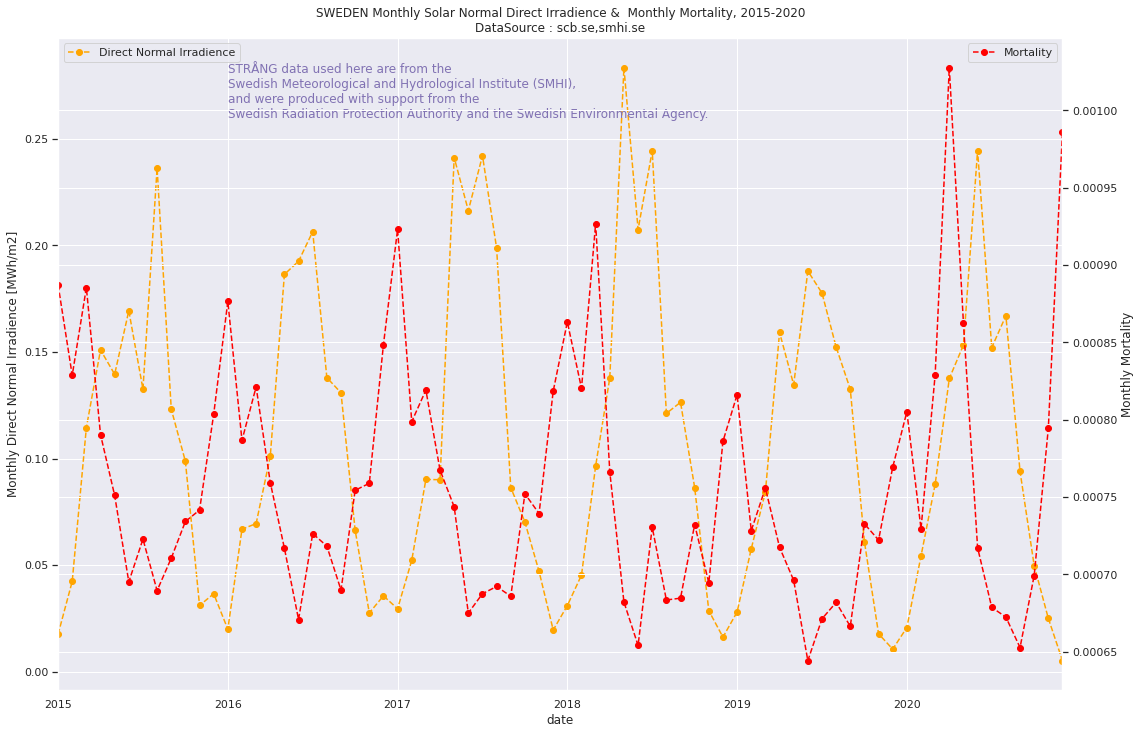

In [71]:
title = 'SWEDEN Monthly Solar Normal Direct Irradience &  Monthly Mortality, 2015-2020\nDataSource : scb.se,smhi.se'
credit = 'STRÅNG data used here are from the\nSwedish Meteorological and Hydrological Institute (SMHI),\n'+\
'and were produced with support from the\nSwedish Radiation Protection Authority and the Swedish Environmental Agency.'

ax = monthly_radiation['2015':].plot(y='value',figsize=(18,12),
                                     color='orange',marker='o',ls='dashed',
                                     label='Direct Normal Irradience',title=title)
ax2 = plt.twinx()

ax.set_ylabel('Monthly Direct Normal Irradience [MWh/m2]')
ax2.set_ylabel('Monthly Mortality')


monthly_radiation['2015':].plot(y='mortality',color='red',ax=ax2,marker='o',ls='dashed',label='Mortality')

ax.text('2016',0.26,credit,color='m')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('smhi_radiation_timeline.jpg',format='jpg')


In [72]:
slope,intercept,_,_,_ = sps.linregress(normalize(monthly_radiation['value']),monthly_radiation['mortality'])
print (slope,intercept)

-4.0036400839965625e-05 0.0007576500103274258


In [73]:


x = normalize(monthly_radiation['value'].values) 

with pm.Model() as model:
    alpha = pm.Normal('alpha',mu=0,sd=2)
    beta = pm.Normal('beta',mu=0,sd=2)
    sigma = pm.Uniform('sigma',0,1)
    
    reg = pm.Deterministic('reg',x * beta + alpha)
    
    obs = pm.Normal('obs',mu=reg,sd=sigma,observed=monthly_radiation['mortality'])
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
alpha    0.001  0.0   0.001    0.001        0.0      0.0    2725.0  2721.0   
beta    -0.000  0.0  -0.000   -0.000        0.0      0.0    2467.0  2312.0   
sigma    0.000  0.0   0.000    0.000        0.0      0.0    1816.0  1816.0   
reg[0]   0.001  0.0   0.001    0.001        0.0      0.0    2710.0  2707.0   
reg[1]   0.001  0.0   0.001    0.001        0.0      0.0    2775.0  2772.0   
...        ...  ...     ...      ...        ...      ...       ...     ...   
reg[67]  0.001  0.0   0.001    0.001        0.0      0.0    2560.0  2560.0   
reg[68]  0.001  0.0   0.001    0.001        0.0      0.0    2770.0  2764.0   
reg[69]  0.001  0.0   0.001    0.001        0.0      0.0    2797.0  2794.0   
reg[70]  0.001  0.0   0.001    0.001        0.0      0.0    2728.0  2725.0   
reg[71]  0.001  0.0   0.001    0.001        0.0      0.0    2683.0  2681.0   

         ess_bulk  ess_tail  r_hat  
alpha      2701.0    1486.

/usr/local/lib/python3.8/site-packages/arviz/stats/stats.py:483: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


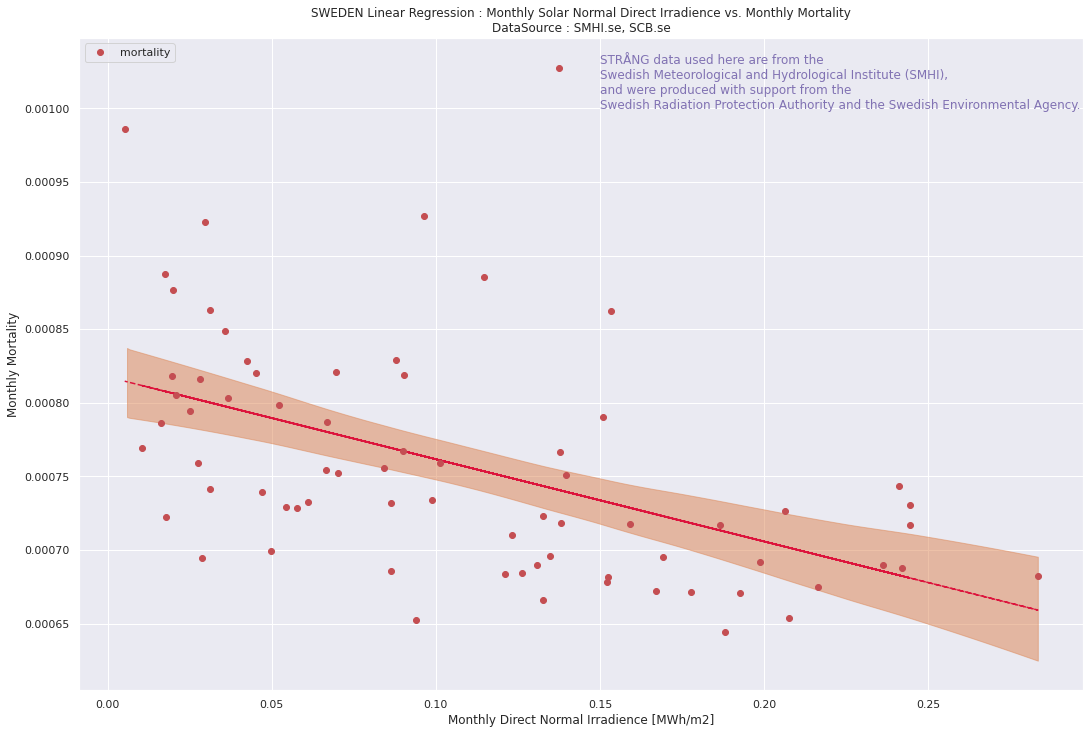

In [74]:
title = 'SWEDEN Linear Regression : Monthly Solar Normal Direct Irradience vs. Monthly Mortality\nDataSource : SMHI.se, SCB.se'

fig,ax = plt.subplots(figsize=(18,12))

ax.set_title(title)

with model:
    print(az.summary(trace))
    az.plot_hdi(monthly_radiation['value'],trace['reg'],ax=ax,hdi_prob=0.89)
    
    ax.plot(monthly_radiation['value'],
            x*trace['beta'].mean() + trace['alpha'].mean(),
            ls='dashed',color='crimson')
    
    #ax.plot(monthly_radiation['value'],x*slope + intercept,ls='dashed',color='k')
    
    monthly_radiation.plot(x='value',y='mortality',style='ro',ax=ax)
    
    ax.text(0.15,0.001,credit,color='m')
    ax.legend(loc='upper left')
    
    plt.ylabel('Monthly Mortality')
    plt.xlabel('Monthly Direct Normal Irradience [MWh/m2]')
    
    plt.savefig('smhi_radiation_regression.jpg',format='jpg')